In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
import data_loading as dl

from plotting import run_plotter as rp
from plotting import histogram as hist

In [3]:
RUN = [1]

rundata_numu, mc_weights_numu, data_pot_numu = dl.load_runs(
    RUN,
    data="opendata_bnb",
    truth_filtered_sets=["nue"],
    loadshowervariables=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    blinded=False,  # sideband needs to be unblinded to work
)

/Users/trettin/miniconda/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
selection = "NUMU"
preselection = "NUMU"
binning_def = ("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")

binning = hist.Binning.from_config(*binning_def)
numu_generator = hist.RunHistGenerator(
    rundata_numu,
    binning,
    data_pot=data_pot_numu,
    selection=selection,
    preselection=preselection,
    sideband_generator=None,
    uncertainty_defaults=None,
)
plotter_numu = rp.RunHistPlotter(numu_generator, selection_title="numu selection")

<AxesSubplot:title={'center':'numu selection'}, xlabel='neutrino reconstructed energy [GeV]', ylabel='Events'>

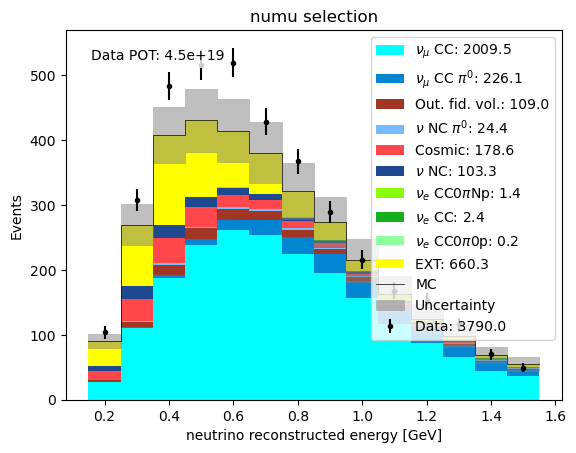

In [11]:
plotter_numu.plot(category_column="category", include_multisim_errors=True, add_ext_error_floor=False, scale_to_pot=None)

In [90]:
RUN = [1, 2, 3]
all_truth_filters = [
    "nue",
    "drt",
    # remove the ones below to save some time
    "nc_pi0",
    "cc_pi0",
    "cc_nopi",
    "cc_cpi",
    "nc_nopi",
    "nc_cpi",
]
rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=all_truth_filters,
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=False,
)

../../data_loading.py:1023: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1023: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:542: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:542: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/Users/trettin/miniconda/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:705: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, 

In [138]:
selection = "NPBDT"
preselection = "NP"
# binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]")
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote
binning = hist.Binning.from_config(*binning_def)
signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=numu_generator,
    uncertainty_defaults=None,
)
plotter = rp.RunHistPlotter(signal_generator, selection_title=None)
plotter.title = plotter.get_selection_title(selection=selection, preselection=preselection)

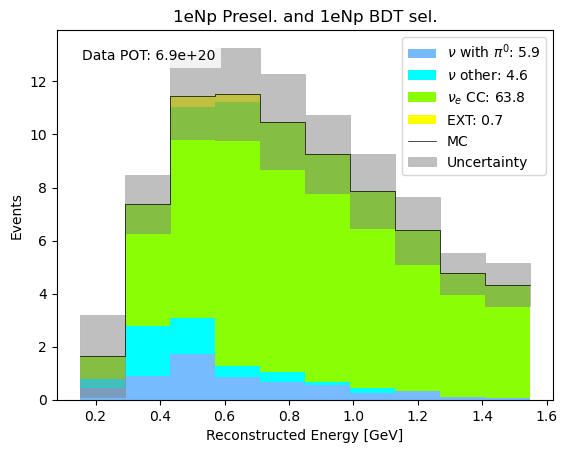

In [140]:
ax = plotter.plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, scale_to_pot=None, use_sideband=False)

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp BDT sel.'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

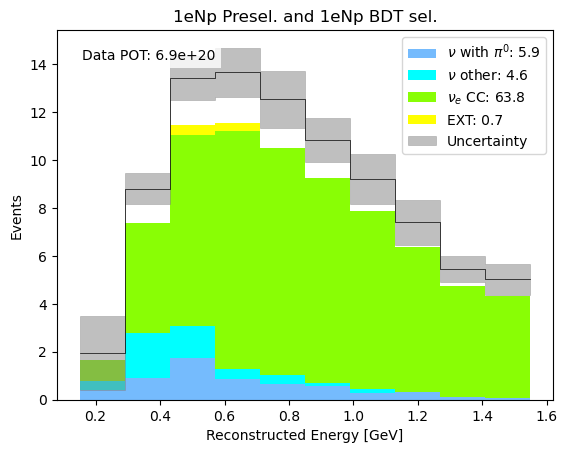

In [141]:
plotter.plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, scale_to_pot=None, use_sideband=True)

In [142]:
selection = "ZPBDT"
preselection = "ZP"
# binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]")
# binning = hist.Binning.from_config(*binning_def)
signal_generator_zp = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=numu_generator,
    uncertainty_defaults=None,
)
plotter_zp = rp.RunHistPlotter(signal_generator_zp, selection_title=None)
plotter_zp.title = plotter.get_selection_title(selection=selection, preselection=preselection)

<AxesSubplot:title={'center':'1e0p Presel. and 1e0p BDT sel.'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

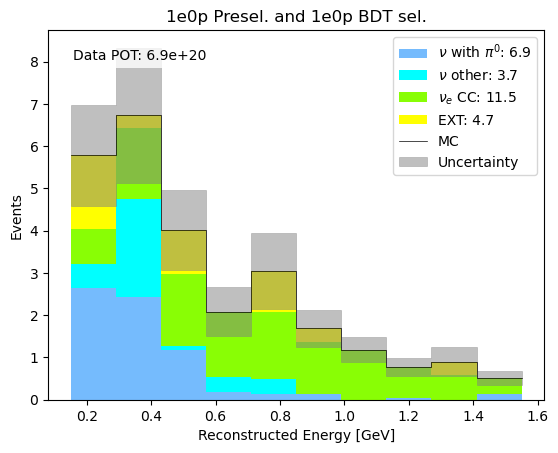

In [143]:
plotter_zp.plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, scale_to_pot=None, use_sideband=False)

In [144]:
# we can also extract the histogram generators and from those get the multiband covariance matrices
sideband_hist_gen = numu_generator.get_hist_generator(which="mc")
np_hist_gen = signal_generator.get_hist_generator(which="mc")
zp_hist_gen = signal_generator_zp.get_hist_generator(which="mc")

In [145]:
ms_column = "weightsFlux"
hist_gens = [np_hist_gen, zp_hist_gen, sideband_hist_gen]
multiband_covariance = hist.HistogramGenerator.multiband_covariance(
    hist_gens,
    ms_column=ms_column
)

In [146]:
# convert the covariance into a correlation matrix
with np.errstate(divide='ignore', invalid='ignore'):
    multiband_correlation = multiband_covariance / np.sqrt(np.outer(np.diag(multiband_covariance), np.diag(multiband_covariance)))
# replace NANs with 0s
multiband_correlation = np.nan_to_num(multiband_correlation)

In [147]:
multiband_correlation

array([[1.        , 0.91180833, 0.91463358, ..., 0.43796469, 0.50701065,
        0.55897647],
       [0.91180833, 1.        , 0.96615825, ..., 0.26466958, 0.33586961,
        0.37464891],
       [0.91463358, 0.96615825, 1.        , ..., 0.39615309, 0.47242897,
        0.51407094],
       ...,
       [0.43796469, 0.26466958, 0.39615309, ..., 1.        , 0.99150472,
        0.96899472],
       [0.50701065, 0.33586961, 0.47242897, ..., 0.99150472, 1.        ,
        0.98533945],
       [0.55897647, 0.37464891, 0.51407094, ..., 0.96899472, 0.98533945,
        1.        ]])

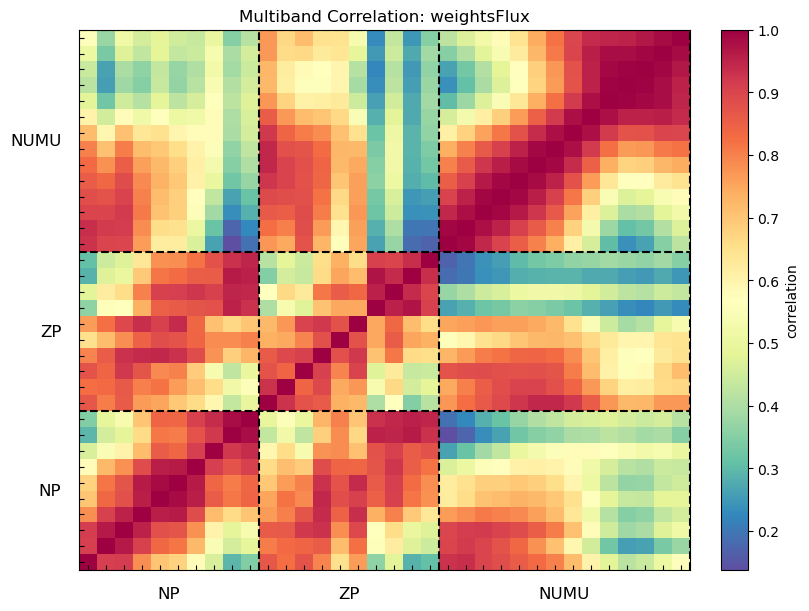

In [151]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
# show the covariance matrix as a heatmap
X, Y = np.meshgrid(np.arange(multiband_correlation.shape[0] + 1), np.arange(multiband_correlation.shape[1] + 1))
p = ax.pcolormesh(X, Y, multiband_correlation.T, cmap="Spectral_r", shading="flat")
# colorbar
cbar = fig.colorbar(p, ax=ax)
cbar.set_label("correlation")
ax.set_title(f"Multiband Correlation: {ms_column}")
# turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
# set tick marks at every bin
ax.set_xticks(np.arange(multiband_correlation.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(multiband_correlation.shape[1]) + 0.5, minor=False)
ax.tick_params(axis='both', which='both', direction="in")


# draw vertical and horizontal lines splitting the different histograms that went
# into the covariance matrix
pos = 0
hist_gen_labels = ["NP", "ZP", "NUMU"]
for hist_gen, label in zip(hist_gens, hist_gen_labels):
    pos += hist_gen.binning.n_bins
    ax.axvline(pos, color="k", linestyle="--")
    ax.axhline(pos, color="k", linestyle="--")
    ax.text(pos - hist_gen.binning.n_bins / 2, -1, label, ha="center", va="top", fontsize=12)
    ax.text(-1, pos - hist_gen.binning.n_bins / 2, label, ha="right", va="center", fontsize=12)

plt.savefig(f"plots/multiband_correlation_{ms_column}.pdf")